# Die Atome der Berechnung

Das Programmieren eines Quantencomputers kann jetzt jeder bequem von zu Hause aus tun.

Aber was erstellen? Was ist überhaupt ein Quantenprogramm? Was ist eigentlich ein Quantencomputer?

Diese Fragen können durch Vergleiche mit Standard-Digitalcomputern beantwortet werden. Leider verstehen die meisten Menschen auch nicht wirklich, wie digitale Computer funktionieren. In diesem Artikel betrachten wir die Grundprinzipien hinter diesen Geräten. Um uns später beim Übergang zum Quantencomputing zu helfen, verwenden wir die gleichen Tools wie für Quanten.

Unten ist etwas Python-Code, den wir ausführen müssen, wenn wir den Code auf dieser Seite verwenden möchten:

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

## 1. Informationen in Bits aufteilen<a id="bits"></a>

Das erste, was wir wissen müssen, ist die Idee der Bits. Diese sollen das einfachste Alphabet der Welt sein. Mit nur zwei Zeichen, 0 und 1, können wir jede Information darstellen.

Ein Beispiel sind Zahlen. Sie sind wahrscheinlich daran gewöhnt, eine Zahl durch eine Folge der zehn Ziffern 0, 1, 2, 3, 4, 5, 6, 7, 8 und 9 darzustellen. In dieser Ziffernfolge stellt jede Ziffer dar, wie oft die Zahl ist enthält eine gewisse Zehnerpotenz. Wenn wir zum Beispiel 9213 schreiben, meinen wir

$$ 9000 + 200 + 10 + 3 $$

oder in einer Weise ausgedrückt, die die Zehnerpotenzen betont

$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$

Obwohl wir dieses System normalerweise basierend auf der Zahl 10 verwenden, können wir genauso einfach eines basierend auf jeder anderen Zahl verwenden. Das binäre Zahlensystem basiert beispielsweise auf der Zahl Zwei. Das bedeutet, die zwei Zeichen 0 und 1 zu verwenden, um Zahlen als Vielfache von Zweierpotenzen auszudrücken. Beispielsweise wird 9213 zu 10001111111101, da

$$ \begin{aligned} 9213 &amp;= (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{ 10}) \ &amp;+ (1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) + (1 \times 2^6) \ &amp;+ (1 \times 2^ 5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) \ &amp;+ (0 \times 2^1) + (1 \times 2^0) \ end{aligned} $$

Dabei drücken wir Zahlen als Vielfache von 2, 4, 8, 16, 32 usw. statt 10, 100, 1000 usw. aus.


In [ ]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

Diese Bitfolgen, die als binäre Zeichenfolgen bekannt sind, können verwendet werden, um mehr als nur Zahlen darzustellen. Beispielsweise gibt es eine Möglichkeit, beliebigen Text mit Bits darzustellen. Für jeden Buchstaben, jede Zahl oder jedes Satzzeichen, das Sie verwenden möchten, können Sie mithilfe [dieser Tabelle](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm) eine entsprechende Zeichenfolge von höchstens acht Bits finden. Obwohl diese recht willkürlich sind, handelt es sich um einen allgemein anerkannten Standard. Tatsächlich wurde es verwendet, um diesen Artikel über das Internet an Sie zu übermitteln.

So werden alle Informationen in Computern dargestellt. Ob Zahlen, Buchstaben, Bilder oder Töne, alles liegt in Form von binären Strings vor.

Quantencomputer basieren wie unsere Standard-Digitalcomputer auf derselben Grundidee. Der Hauptunterschied besteht darin, dass sie *Qubits* verwenden, eine Erweiterung des Bits zur Quantenmechanik. Im Rest dieses Lehrbuchs werden wir untersuchen, was Qubits sind, was sie können und wie sie es tun. In diesem Abschnitt sprechen wir jedoch überhaupt nicht von Quanten. Wir verwenden Qubits also einfach so, als wären sie Bits.

<!-- ::: q-block.exercise -->

## Übung

Vervollständige diese Sätze:

1. Die Zahl „5“ in Dezimalform ist [[101|11001|110|001]] in Binärform.
2. Wenn unser Computer 1 Bit hat, kann es sich in [[2|1|3|4]] verschiedenen Zuständen befinden.
3. Wenn unser Computer 2 Bits hat, kann er sich in [[4|3|2|8]] verschiedenen Zuständen befinden.
4. Wenn unser Computer 8 Bit hat, kann er sich in [[256|128|342]] verschiedenen Zuständen befinden.
5. Wenn Sie $n$ Bits haben, können sie sich in [[$2^n$|$n×2$|$n^2$]] verschiedenen Zuständen befinden.

<!-- ::: -->


## 2. Berechnung als Diagramm<a id="diagram"></a>

Ob wir Qubits oder Bits verwenden, wir müssen sie manipulieren, um die Eingaben, die wir haben, in die Ausgaben umzuwandeln, die wir brauchen. Für einfachste Programme mit sehr wenigen Bits ist es sinnvoll, diesen Vorgang in einem Diagramm darzustellen, das als *Schaltplan bezeichnet* wird. Diese haben Eingänge auf der linken Seite, Ausgänge auf der rechten Seite und Operationen, die durch obskure Symbole dazwischen dargestellt werden. Diese Operationen werden hauptsächlich aus historischen Gründen als „Tore“ bezeichnet.

Hier ist ein Beispiel dafür, wie eine Schaltung für standardmäßige, bitbasierte Computer aussieht. Es wird nicht erwartet, dass Sie verstehen, was es tut. Es sollte Ihnen lediglich eine Vorstellung davon vermitteln, wie diese Schaltungen aussehen.

![Bild1](images/classical_circuit.png)

Für Quantencomputer verwenden wir die gleiche Grundidee, haben aber unterschiedliche Konventionen für die Darstellung von Eingaben, Ausgaben und den für Operationen verwendeten Symbolen. Hier ist der Quantenschaltkreis, der den gleichen Prozess wie oben darstellt.

![Bild2](images/quantum_circuit.png)

Im Rest dieses Abschnitts erklären wir, wie man Schaltungen baut. Am Ende wissen Sie, wie Sie die obige Schaltung erstellen, was sie tut und warum sie nützlich ist.

## 3. Ihr erster Quantenschaltkreis<a id="first-circuit"></a>

In einer Schaltung müssen wir normalerweise drei Aufgaben erledigen: Zuerst die Eingabe codieren, dann einige tatsächliche Berechnungen durchführen und schließlich eine Ausgabe extrahieren. Für Ihre erste Quantenschaltung konzentrieren wir uns auf die letzte dieser Aufgaben. Wir beginnen mit der Erstellung einer Schaltung mit acht Qubits und acht Ausgängen.

In [3]:
qc_output = QuantumCircuit(8)

Diese Schaltung, die wir `qc_output` genannt haben, wird von Qiskit mit `QuantumCircuit` . Der `QuantumCircuit` nimmt die Anzahl der Qubits im Quantenschaltkreis als Argument.

Die Extraktion von Ausgängen in einer Quantenschaltung erfolgt mit einer Operation namens `measure_all()` . Jede Messung weist ein bestimmtes Qubit an, eine Ausgabe an ein bestimmtes Ausgabebit zu geben. Der Befehl `qc_output.measure_all()` fügt jedem Qubit in der Schaltung `qc_output` eine Messung hinzu und fügt auch einige klassische Bits hinzu, um die Ausgabe zu schreiben.

In [4]:
qc_output.measure_all()

Nun, da unsere Schaltung etwas enthält, werfen wir einen Blick darauf.

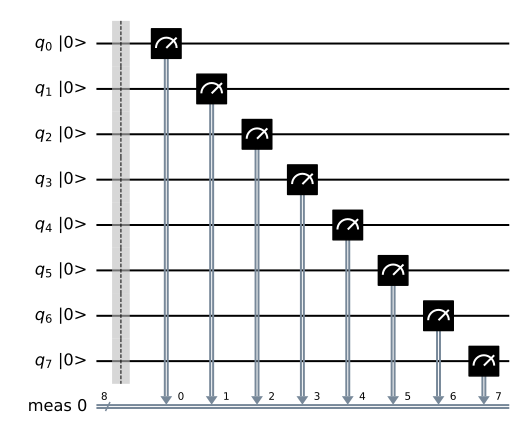

In [5]:
qc_output.draw(initial_state=True) 

Qubits werden immer initialisiert, um die Ausgabe `0` zu geben. Da wir in der obigen Schaltung nichts mit unseren Qubits machen, erhalten wir genau dieses Ergebnis, wenn wir sie messen. Wir können dies sehen, indem wir die Schaltung viele Male laufen lassen und die Ergebnisse in einem Histogramm darstellen. Wir werden feststellen, dass das Ergebnis immer `00000000` ist: eine `0` von jedem Qubit.

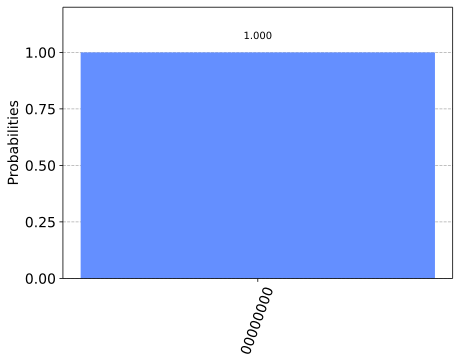

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

Der Grund für die häufige Ausführung und die Anzeige des Ergebnisses als Histogramm liegt darin, dass Quantencomputer in ihren Ergebnissen eine gewisse Zufälligkeit aufweisen können. Da wir in diesem Fall nichts Quantum tun, erhalten wir mit Sicherheit nur das Ergebnis `00000000` .

Beachten Sie, dass dieses Ergebnis von einem Quantensimulator stammt, bei dem es sich um einen Standardcomputer handelt, der berechnet, was ein idealer Quantencomputer tun würde. Simulationen sind nur für eine kleine Anzahl von Qubits (~30 Qubits) möglich, aber sie sind dennoch ein sehr nützliches Werkzeug beim Entwurf Ihrer ersten Quantenschaltkreise. Um auf einem echten Gerät zu laufen, müssen Sie einfach `Aer.get_backend('aer_simulator')` durch das Backend-Objekt des Geräts ersetzen, das Sie verwenden möchten. 

## 4. Beispiel: Erstellen einer Addiererschaltung<a id="adder"></a>

### 4.1 Kodierung eines Eingangs<a id="encoding"></a>

Sehen wir uns nun an, wie eine andere binäre Zeichenfolge als Eingabe codiert wird. Dazu benötigen wir ein sogenanntes NICHT-Gatter. Dies ist die grundlegendste Operation, die Sie in einem Computer ausführen können. Es dreht einfach den Bitwert um: `0` wird `1` und `1` wird `0` . Für Qubits ist es eine Operation namens `x` , die die Arbeit des NOT erledigt.

Unten erstellen wir eine neue Schaltung, die der Codierung gewidmet ist, und nennen sie `qc_encode` . Im Moment geben wir nur die Anzahl der Qubits an.

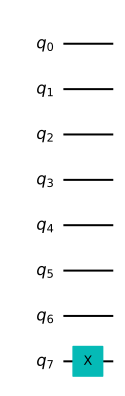

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

Das Extrahieren von Ergebnissen kann mit der Schaltung erfolgen, die wir von zuvor haben: `qc_output` .

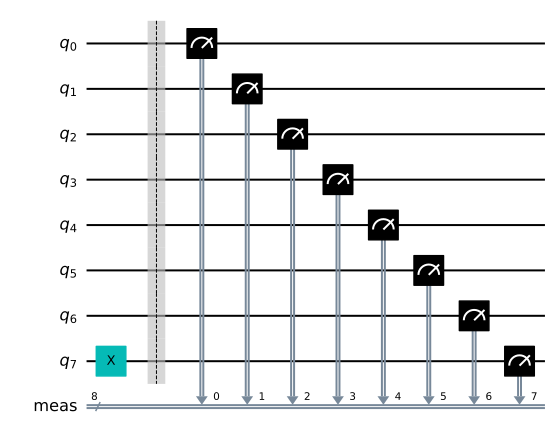

In [8]:
qc_encode.measure_all()
qc_encode.draw()

Jetzt können wir die kombinierte Schaltung ausführen und uns die Ergebnisse ansehen.

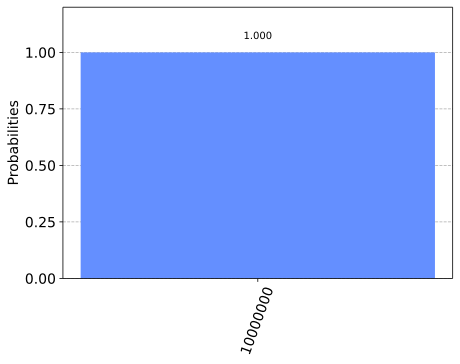

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Jetzt gibt unser Computer stattdessen den String `10000000` .

Das Bit, das wir umgedreht haben und das von Qubit 7 stammt, befindet sich ganz links in der Zeichenfolge. Dies liegt daran, dass Qiskit die Bits in einer Zeichenfolge von rechts nach links nummeriert. Einige bevorzugen es, ihre Bits andersherum zu nummerieren, aber das System von Qiskit hat sicherlich seine Vorteile, wenn wir die Bits zur Darstellung von Zahlen verwenden. Konkret bedeutet dies, dass uns Qubit 7 mitteilt, wie viele `2^7` s wir in unserer Zahl haben. Durch Umdrehen dieses Bits haben wir nun die Zahl [[128|256|64|32]] in unseren einfachen 8-Bit-Computer geschrieben.

Versuchen Sie jetzt, eine andere Zahl für sich selbst zu schreiben. Du könntest zum Beispiel dein Alter machen. Verwenden Sie einfach eine Suchmaschine, um herauszufinden, wie die Zahl im Binärformat aussieht (wenn sie ein „0b“ enthält, ignorieren Sie es einfach) und fügen Sie dann einige 0s auf der linken Seite hinzu, wenn Sie jünger als 128 sind.

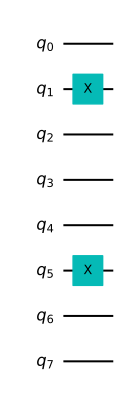

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

Jetzt wissen wir, wie man Informationen in einem Computer verschlüsselt. Der nächste Schritt ist die Verarbeitung: Eine Eingabe, die wir codiert haben, in eine Ausgabe umzuwandeln, die wir brauchen.

### 4.2 Merken, wie man hinzufügt<a id="remembering-add"></a>

Um Inputs in Outputs umzuwandeln, müssen wir ein Problem lösen. Lassen Sie uns einige grundlegende Mathematik tun. In der Grundschule haben Sie gelernt, große mathematische Probleme in überschaubare Stücke zu zerlegen. Wie würden Sie zum Beispiel vorgehen, um die folgende Aufgabe zu lösen?

```code
   9213
+  1854
=  ????
```

Eine Möglichkeit ist, es Ziffer für Ziffer von rechts nach links zu tun. Also fangen wir mit 3+4 an

```code
   9213
+  1854
=  ???7
```

Und dann 1+5

```code
   9213
+  1854
=  ??67
```

Dann haben wir 2+8=10. Da dies eine zweistellige Antwort ist, müssen wir die Eins in die nächste Spalte übertragen.

```code
   9213
+  1854
=  ?067
   ¹
```

Schließlich haben wir 9+1+1=11 und bekommen unsere Antwort

```code
   9213
+  1854
= 11067
   ¹
```

Dies mag nur eine einfache Addition sein, aber es demonstriert die Prinzipien hinter allen Algorithmen. Ob der Algorithmus darauf ausgelegt ist, mathematische Probleme zu lösen oder Text oder Bilder zu verarbeiten, wir zerlegen große Aufgaben immer in kleine und einfache Schritte.

Um auf einem Computer zu laufen, müssen Algorithmen auf die kleinsten und einfachsten Schritte herunterkompiliert werden. Um zu sehen, wie diese aussehen, machen wir das obige Additionsproblem noch einmal, aber in Binärform.

```code
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

Beachten Sie, dass die zweite Zahl auf der linken Seite ein paar zusätzliche Nullen hat. Dies dient nur dazu, die beiden Saiten gleich lang zu machen.

Unsere erste Aufgabe besteht darin, die 1+0 für die rechte Spalte zu machen. Im Binärsystem ist die Antwort wie in jedem Zahlensystem 1. Wir erhalten das gleiche Ergebnis für die 0+1 der zweiten Spalte.

```code
   10001111111101
+  00011100111110

=  ????????????11
```

Als nächstes haben wir 1+1. Wie Sie sicher wissen, ist 1+1=2. Im Binärformat wird die Zahl 2 als `10` geschrieben und benötigt daher zwei Bits. Das bedeutet, dass wir die 1 übertragen müssen, genauso wie wir es für die Zahl 10 in Dezimalzahlen tun würden.

```code
   10001111111101
+  00011100111110
=  ???????????011
             ¹
```

In der nächsten Spalte müssen wir nun `1+1+1` berechnen. Das bedeutet, drei Zahlen zusammenzuzählen, also wird es für unseren Computer kompliziert. Aber wir können es immer noch auf einfachere Operationen herunterkompilieren, und zwar auf eine Weise, bei der wir immer nur zwei Bits addieren müssen. Dazu können wir nur mit den ersten beiden 1en beginnen.

```code
   1
+  1
= 10
```

Jetzt müssen wir diese `10` zur letzten `1` hinzufügen, was mit unserer üblichen Methode zum Durchgehen der Spalten erfolgen kann.

```code
  10
+ 01
= 11
```

Die endgültige Antwort ist `11` (auch bekannt als 3).

Jetzt können wir uns dem Rest des Problems zuwenden. Mit der Antwort `11` haben wir ein weiteres Carry-Bit.

```code
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

Jetzt haben wir also ein weiteres 1+1+1 vor uns. Aber wir wissen bereits, wie das geht, also ist es keine große Sache.

Tatsächlich ist alles, was bisher übrig geblieben ist, etwas, von dem wir bereits wissen, wie es geht. Das liegt daran, dass, wenn Sie alles in nur zwei Bits aufteilen, es nur vier mögliche Dinge gibt, die Sie jemals berechnen müssen. Hier sind die vier Grundsummen (wir schreiben alle Antworten mit zwei Bits, um konsistent zu sein).

```code
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

Dies wird als *Halbaddierer* bezeichnet. Wenn unser Computer dies implementieren und viele davon verketten kann, kann er alles hinzufügen.

### 4.3 Hinzufügen mit Qiskit<a id="adding-qiskit"></a>

Lassen Sie uns mit Qiskit unseren eigenen Halbaddierer erstellen. Dies umfasst einen Teil der Schaltung, der die Eingabe codiert, einen Teil, der den Algorithmus ausführt, und einen Teil, der das Ergebnis extrahiert. Der erste Teil muss geändert werden, wenn wir eine neue Eingabe verwenden möchten, aber der Rest bleibt immer gleich.

![Halbaddierer, der auf einer Quantenschaltung implementiert ist](images/half-adder.svg)


Die beiden Bits, die wir hinzufügen möchten, sind in den Qubits 0 und 1 codiert. Das obige Beispiel codiert eine `1` in diesen beiden Qubits und versucht daher, die Lösung von `1+1` zu finden. Das Ergebnis ist eine Zeichenfolge aus zwei Bits, die wir aus den Qubits 2 und 3 auslesen und in den klassischen Bits 0 bzw. 1 speichern.

Die Grundoperationen des Rechnens sind als Logikgatter bekannt. Wir haben bereits das NICHT-Gatter verwendet, aber das reicht nicht aus, um unseren Halbaddierer zu machen. Wir konnten es nur verwenden, um die Antworten manuell aufzuschreiben. Da wir möchten, dass der Computer die eigentliche Berechnung für uns erledigt, benötigen wir einige leistungsfähigere Gates.

Um zu sehen, was wir brauchen, schauen wir uns noch einmal an, was unser Halbaddierer tun muss.

```code
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

Das Bit ganz rechts in allen vier Antworten wird vollständig davon bestimmt, ob die beiden Bits, die wir hinzufügen, gleich oder unterschiedlich sind. Also für `0+0` und `1+1` , wo die beiden Bits gleich sind, kommt das ganz rechte Bit der Antwort heraus [[0|1]]. Für `0+1` und `1+0` , wo wir unterschiedliche Bitwerte addieren, ist das Bit ganz rechts [[1|0]].

Um diesen Teil unserer Lösung richtig zu machen, brauchen wir etwas, das herausfinden kann, ob zwei Bits unterschiedlich sind oder nicht. Traditionell wird dies beim Studium digitaler Berechnungen als [XOR-Gatter](gloss:xor) bezeichnet.

Eingang 1 | Eingang 2 | XOR-Ausgabe
:-: | :-: | :-:
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

In Quantencomputern wird die Arbeit des XOR-Gatters vom gesteuerten NICHT-Gatter erledigt. Da das ein ziemlich langer Name ist, nennen wir ihn normalerweise einfach CNOT. In Qiskit heißt es `cx` , was noch kürzer ist. In Schaltplänen wird es wie im Bild unten gezeichnet.

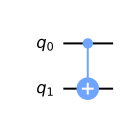

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

Dies wird auf ein Paar Qubits angewendet. Eines fungiert als Kontroll-Qubit (das ist das mit dem kleinen Punkt). Das andere fungiert als *Ziel-Qubit* (mit dem großen Kreis, in dem sich ein `+` befindet).

Es gibt mehrere Möglichkeiten, die Wirkung der CNOT zu erklären. Eines ist zu sagen, dass es seine zwei Eingangsbits betrachtet, um zu sehen, ob sie gleich oder unterschiedlich sind. Als nächstes überschreibt es das Ziel-Qubit mit der Antwort. Das Ziel wird `0` , wenn sie gleich sind, und `1` , wenn sie unterschiedlich sind.

<img src="images/cnot_xor.svg">

Eine andere Möglichkeit, CNOT zu erklären, besteht darin, zu sagen, dass es ein NOT auf das Ziel ausführt, wenn die Steuerung `1` ist, und ansonsten nichts tut. Diese Erklärung ist genauso gültig wie die vorherige (tatsächlich gibt sie dem Tor seinen Namen).

Probieren Sie das CNOT selbst aus, indem Sie jede der möglichen Eingaben ausprobieren. Hier ist zum Beispiel eine Schaltung, die den CNOT mit dem Eingang `01` testet.

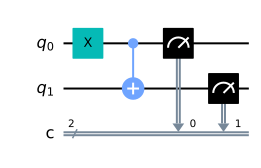

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

Wenn Sie diese Schaltung ausführen, werden Sie feststellen, dass der Ausgang `11` ist. Wir können uns vorstellen, dass dies aus einem der folgenden Gründe geschieht.

- Der CNOT berechnet, ob die Eingabewerte unterschiedlich sind, und stellt fest, dass dies der Fall ist, was bedeutet, dass er `1` ausgeben möchte. Dies geschieht, indem der Zustand von Qubit 1 (der sich, wie Sie wissen, links von der Bitfolge befindet) überschrieben wird, wodurch `01` in `11` umgewandelt wird.

- Der CNOT sieht, dass sich Qubit 0 im Zustand `1` befindet, und wendet daher ein NOT auf Qubit 1 an. Dadurch wird die `0` von Qubit 1 in eine `1` gekippt und so `01` in `11` umgewandelt.

Hier ist eine Tabelle, die alle möglichen Eingänge und entsprechenden Ausgänge des CNOT-Gatters zeigt:

Eingang (q1 q0) | Ausgang (q1 q0)
:-: | :-:
00 | 00
01 | 11
10 | 10
11 | 01

Für unseren Halbaddierer wollen wir keinen unserer Eingänge überschreiben. Stattdessen wollen wir das Ergebnis auf ein anderes Qubit-Paar schreiben. Dafür können wir zwei CNOTs verwenden.

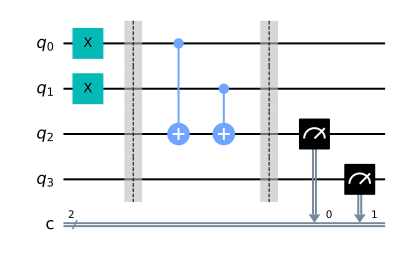

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

Wir sind jetzt auf halbem Weg zu einem voll funktionsfähigen Halbaddierer. Wir haben nur noch das andere Bit der Ausgabe zu erledigen: dasjenige, das auf Qubit 3 leben wird.

Wenn Sie sich die vier möglichen Summen noch einmal ansehen, werden Sie feststellen, dass es nur einen Fall gibt, bei dem dies `1` statt `0` ist: `1+1` = `10` . Es passiert nur, wenn beide Bits, die wir hinzufügen, `1` sind.

Um diesen Teil der Ausgabe zu berechnen, könnten wir unseren Computer einfach dazu bringen, zu prüfen, ob beide Eingaben `1` sind. Wenn sie es sind – und nur wenn sie es sind – müssen wir ein NICHT-Gatter auf Qubit 3 machen. Das wird es nur für diesen Fall auf den erforderlichen Wert von `1` umdrehen und uns die Ausgabe geben, die wir brauchen.

Dafür brauchen wir ein neues Gate: wie ein CNOT, aber gesteuert auf zwei Qubits statt nur auf einem. Dadurch wird nur dann ein NOT für das Ziel-Qubit ausgeführt, wenn sich beide Steuerelemente im Zustand `1` befinden. Dieses neue Tor heißt [Toffoli](gloss:toffoli) . Für diejenigen unter Ihnen, die mit booleschen Logikgattern vertraut sind, handelt es sich im Grunde genommen um ein UND-Gatter.

In Qiskit wird der Toffoli mit dem `ccx` Befehl dargestellt.

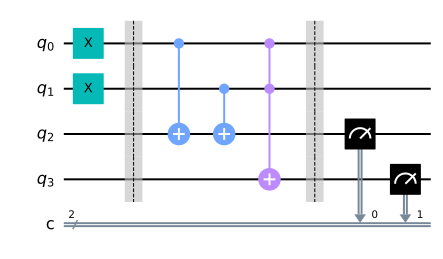

In [14]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

In diesem Beispiel berechnen wir `1+1` , da die beiden Eingangsbits beide `1` sind. Mal sehen, was wir bekommen.

/home/divs/.local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


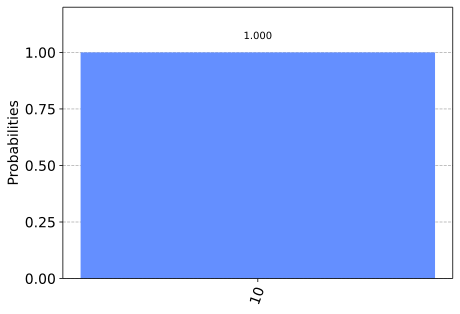

In [15]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Das Ergebnis ist `10` , was die binäre Darstellung der Zahl 2 ist. Wir haben einen Computer gebaut, der das berühmte mathematische Problem 1+1 lösen kann!

Jetzt können Sie es mit den anderen drei möglichen Eingaben ausprobieren und zeigen, dass unser Algorithmus auch für diese die richtigen Ergebnisse liefert.

Der Halbaddierer enthält alles, was Sie zum Addieren benötigen. Mit den Gattern NOT, CNOT und Toffoli können wir Programme erstellen, die eine beliebige Menge von Zahlen beliebiger Größe addieren.

Diese drei Gatter reichen aus, um auch alles andere im Computerbereich zu erledigen. Tatsächlich können wir sogar auf die CNOT verzichten. Außerdem wird das NICHT-Gatter nur wirklich benötigt, um Bits mit dem Wert `1` zu erstellen. Das Toffoli-Gatter ist im Wesentlichen das Atom der Mathematik. Es ist das einfachste Element, aus dem sich jede andere Problemlösungstechnik zusammenstellen lässt.

Wie wir sehen werden, spalten wir beim Quantencomputing das Atom.

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/divs/.local/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.2
qiskit-aer,0.9.0
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.5
qiskit,0.30.0
qiskit-nature,0.2.1
qiskit-finance,0.2.1
qiskit-optimization,0.2.2
qiskit-machine-learning,0.2.1
